In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
#The above data tells us that there is 1 duplicate row in the dataset.
# dropping the duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
df.isnull().sum().any()

np.False_

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
print("shape of data", df.shape)
print("Rows", df.shape[0])
print("Columns", df.shape[1])

shape of data (1337, 7)
Rows 1337
Columns 7


In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


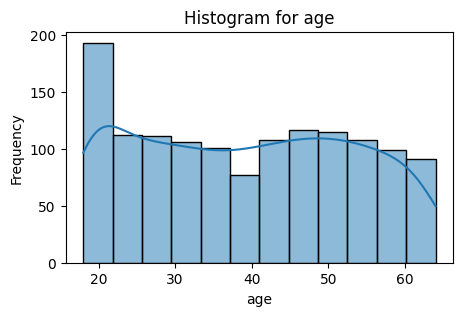

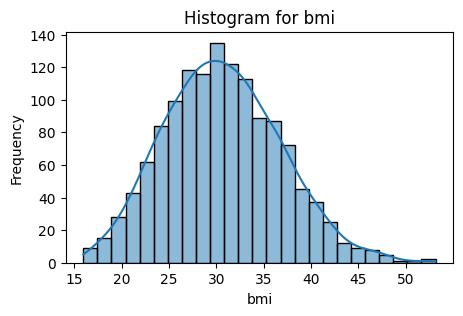

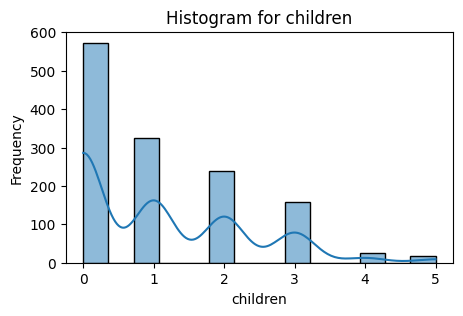

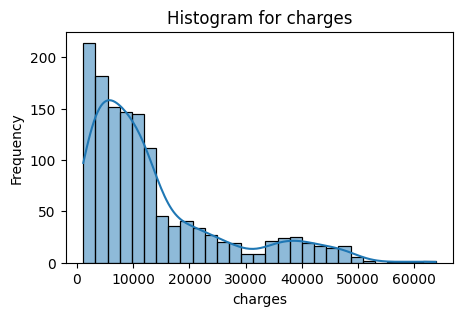

In [ ]:
for col in df.select_dtypes(include = np.number):
  plt.figure(figsize=(5,3))
  sns.histplot(df[col], kde=True)
  plt.title(f'Histogram for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

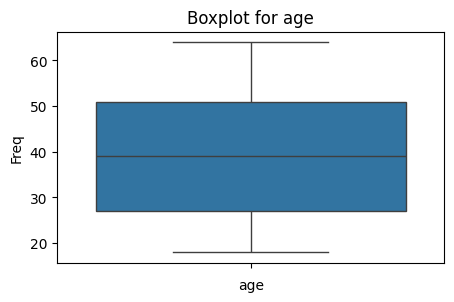

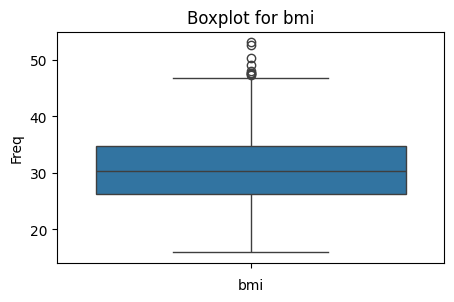

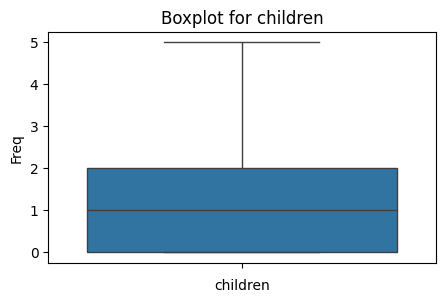

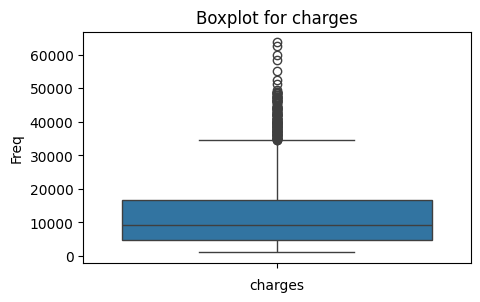

In [ ]:
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Freq')
  plt.show()

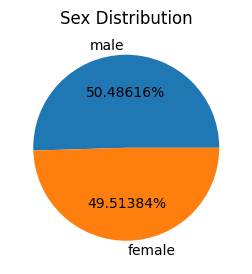

In [ ]:
counts = df['sex'].value_counts()

plt.figure(figsize=(3, 5))
plt.pie(counts, labels=counts.index, autopct='%5.5f%%')
plt.title('Sex Distribution')
plt.show()

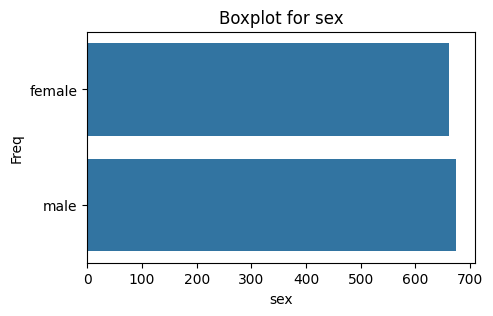

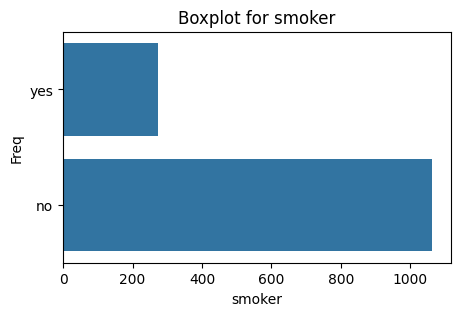

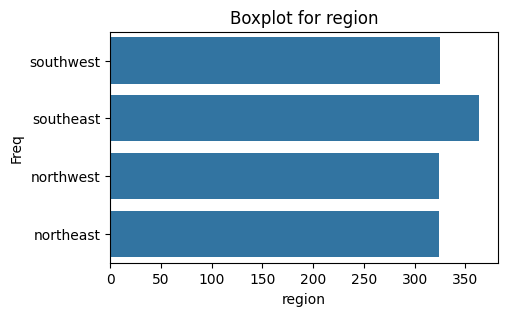

In [ ]:
for col in df.select_dtypes(include=np.object_):
  plt.figure(figsize=(5,3))
  sns.countplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Freq')
  plt.show()

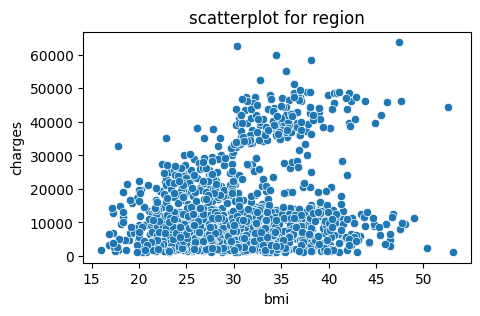

In [ ]:
  plt.figure(figsize=(5,3))
  sns.scatterplot(x='bmi', y='charges', data=df)
  plt.title(f'scatterplot for {col}')
  plt.xlabel('bmi')
  plt.ylabel('charges')
  plt.show()

In [ ]:
df.loc[df['sex'] == 'female', 'sex' ] =0
df.loc[df['sex'] == 'male', 'sex'] =1

df.loc[df['smoker'] == 'no', 'smoker'] =0
df.loc[df['smoker'] == 'yes', 'smoker'] =1
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
#one-hot encoding for 'Region' column
df = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
# Replacing false with 0 and true with 1
df.replace(False,0,inplace=True)
df.replace(True,1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


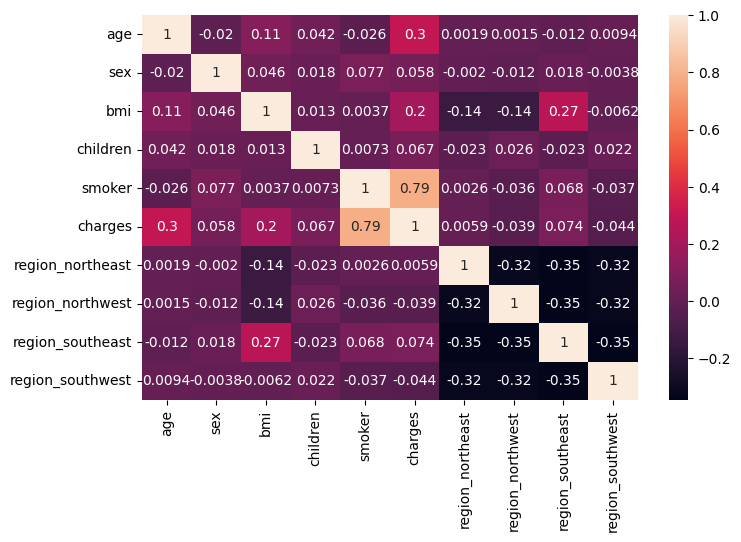

In [ ]:
# Correlation analysis using Pearson's Correlation Coefficient
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
'''
From the above column, if you observe, we can see the following conclusions ->
(1) "charges" are showing strong positive correlation with "smoker" column
(2) "charges" are showing weak positive correlation with "age" and "bmi" column
(3) "charges" is uncorrelated to the remaining columns
'''

In [ ]:
'''
We are going to create 2 models ->
(1) Simple Linear Regression -> charges ~ smoker
(2) Multiple Linear Regression -> charges ~ age + bmi + smoker
'''

In [ ]:
# Simple Linear Regression ->

In [ ]:
# Seperating input and output features
X = df[['smoker']]
y=df[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#creating the model
from sklearn.linear_model import LinearRegression

#initiating the model
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#taking predictions from the trained model on training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

#r2_score
print('Training R2 score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 score :',np.round(r2_score(y_test, y_test_pred),2))


Training R2 score : 0.63
Testing R2 score : 0.59


In [ ]:
#RMSE
print('Training RMSE :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Testing RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training RMSE : 7394.469322774586
Testing RMSE : 7745.323275270111


In [ ]:
#Multiple Linear Regression
# Seperating input and output features
X = df[['smoker', 'age','bmi']]
y=df[['charges']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#initiating the model
lr = LinearRegression()

lr.fit(X_train, y_train)

#taking predictions from the trained model on training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
#r2_score
print('Training R2 score :', np.round(r2_score(y_train, y_train_pred), 2))
print('Testing R2 score :',np.round(r2_score(y_test, y_test_pred),2))

Training R2 score : 0.75
Testing R2 score : 0.72
